<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/03_introduction_to_computer_vision_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

The images we're working with are from [Kaggle Food101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101)

We have modified the dataset to use only pizza and steak

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-31 18:49:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.207, 142.250.125.207, 142.250.136.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  86.4MB/s    in 1.2s    

2023-12-31 18:49:04 (86.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

Visualizing many samples of data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os

# Walk through pizza_steak directory and count number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first get the class names programmatically

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up target directory
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in image and plot
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {image.shape}") # show the shape of the image
  return image


Image shape: (512, 512, 3)


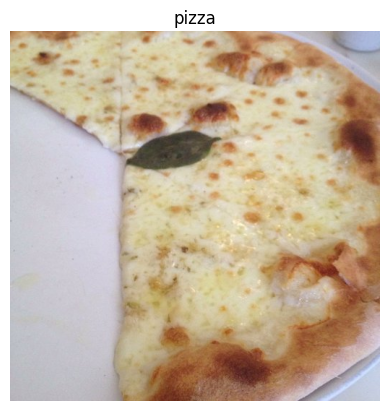

In [8]:
img = view_random_image("pizza_steak/train", "pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[153, 106,  62],
        [157, 110,  66],
        [163, 116,  70],
        ...,
        [167, 181, 216],
        [167, 181, 216],
        [171, 185, 220]],

       [[156, 109,  65],
        [160, 113,  69],
        [167, 120,  74],
        ...,
        [168, 182, 217],
        [170, 184, 219],
        [176, 190, 225]],

       [[160, 113,  69],
        [165, 118,  74],
        [173, 125,  79],
        ...,
        [168, 182, 217],
        [171, 185, 220],
        [177, 191, 226]],

       ...,

       [[184, 181, 188],
        [183, 180, 187],
        [182, 179, 186],
        ...,
        [198, 205, 221],
        [198, 205, 221],
        [198, 205, 221]],

       [[184, 181, 188],
        [183, 180, 187],
        [181, 178, 185],
        ...,
        [198, 206, 219],
        [198, 206, 219],
        [198, 206, 219]],

       [[181, 178, 185],
        [180, 177, 184],
        [179, 176, 183],
        ...,
        [198, 206, 21

In [10]:
# View shape
img.shape # width, heigh, color channels

(512, 512, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.6       , 0.41568627, 0.24313725],
        [0.61568627, 0.43137255, 0.25882353],
        [0.63921569, 0.45490196, 0.2745098 ],
        ...,
        [0.65490196, 0.70980392, 0.84705882],
        [0.65490196, 0.70980392, 0.84705882],
        [0.67058824, 0.7254902 , 0.8627451 ]],

       [[0.61176471, 0.42745098, 0.25490196],
        [0.62745098, 0.44313725, 0.27058824],
        [0.65490196, 0.47058824, 0.29019608],
        ...,
        [0.65882353, 0.71372549, 0.85098039],
        [0.66666667, 0.72156863, 0.85882353],
        [0.69019608, 0.74509804, 0.88235294]],

       [[0.62745098, 0.44313725, 0.27058824],
        [0.64705882, 0.4627451 , 0.29019608],
        [0.67843137, 0.49019608, 0.30980392],
        ...,
        [0.65882353, 0.71372549, 0.85098039],
        [0.67058824, 0.7254902 , 0.8627451 ],
        [0.69411765, 0.74901961, 0.88627451]],

       ...,

       [[0.72156863, 0.70980392, 0.7372549 ],
        [0.71764706, 0.70588235, 0.73333333],
        [0.71372549, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need way to:
* Load our images
* Preprocess our images
* Build a  CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size= 32,
                                               target_size=(224,224), class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir, batch_size=32,
                                               target_size = (224,224),class_mode = "binary",
                                               seed = 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 178ms/step - loss: 0.6193 - accuracy: 0.6660 - val_loss: 0.4364 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4390 - accuracy: 0.8000 - val_loss: 0.3580 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4446 - accuracy: 0.8013 - val_loss: 0.3740 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.4018 - accuracy: 0.8207 - val_loss: 0.3601 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3449 - accuracy: 0.8587 - val_loss: 0.3336 - val_accuracy: 0.8640


> **Note:** If the cell is taking a long time to run, switch runtime to use GPU!

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before
Let's replicate a model we've built in a previous section to see if it work with our image data

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 0.6576 - accuracy: 0.6247 - val_loss: 0.6086 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6075 - accuracy: 0.7360 - val_loss: 0.5956 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.5857 - accuracy: 0.7580 - val_loss: 0.5678 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.5733 - accuracy: 0.7587 - val_loss: 0.5517 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.5500 - accuracy: 0.7840 - val_loss: 0.5423 - val_accuracy: 0.7940


> Peformance isn't good. Practically guessing. Stick with a CNN!!

In [15]:
# Dense model has a lot more parameters
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Let's try to improve model 2
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 3.5337 - accuracy: 0.6033 - val_loss: 0.5498 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.7389 - accuracy: 0.7053 - val_loss: 0.4476 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6015 - accuracy: 0.7353 - val_loss: 0.4841 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6031 - accuracy: 0.7320 - val_loss: 0.4572 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4852 - accuracy: 0.7893 - val_loss: 0.5129 - val_accuracy: 0.7660


In [17]:
# Better than model 2 but still not better than the CNN model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down
1. Visualize Data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust parameters
7. Repeat until satisfied

### 1. Visualize Data

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


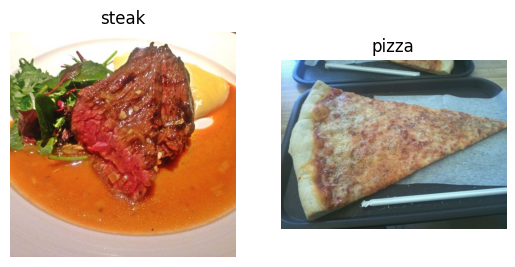

In [18]:
# visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [19]:
# Train and Test sets already split from download
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

**Turn our data into batches**
* all images might not fit into memory; split into batches

In [20]:
# Create train and test data generators and rescale the data e.g. loading data into memory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# automatically turns images into TF tensors
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [21]:
# need way to load in our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, # target directory
                                             target_size=(224, 224), # height x width
                                             class_mode='binary', # binary classification (binary data)
                                             batch_size=32) # size of mini-batches

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [23]:
# How many batches are there
len(train_data)

47

In [24]:
1500/32

46.875

In [25]:
# Get the first two images
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.48627454, 0.42352945, 0.36078432],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.82745105, 0.7137255 , 0.48627454],
         [0.8431373 , 0.7372549 , 0.5294118 ],
         [0.87843144, 0.77647066, 0.58431375]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.49803925],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.4901961 ],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.77647066, 0.53333336, 0.23137

Note that images have been scaled (normalized) and their shape is (224, 224, 3)

In [26]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [27]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
# Baseline model = start here and then begin modifying to improve
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid',
           activation='relu',input_shape=(224,224,3)), # input layer specify shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer; binary classification => sigmoid
])

In [29]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [30]:
# Summary of model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Check the lengths of training and test generators
len(train_data), len(test_data) # number of batches

(47, 16)

In [32]:
# Fit the model
history_4 = model_4.fit(train_data, # train_data is combination of image tensors and labels
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 136ms/step - loss: 0.8785 - accuracy: 0.6140 - val_loss: 0.4983 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4721 - accuracy: 0.7913 - val_loss: 0.4259 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3424 - accuracy: 0.8700 - val_loss: 0.3936 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.2078 - accuracy: 0.9327 - val_loss: 0.3659 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.1149 - accuracy: 0.9660 - val_loss: 0.4436 - val_accuracy: 0.7800


In [33]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 98ms/step - loss: 0.3336 - accuracy: 0.8640


[0.3335833251476288, 0.8640000224113464]

In [34]:
model_1.summary() # model_1 is still better; let's modify model_4

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaulating our model

<Axes: >

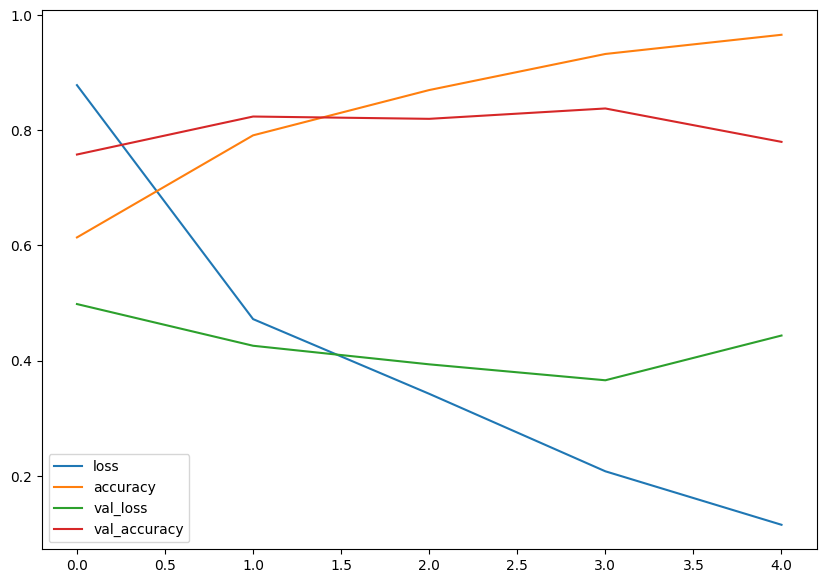

In [35]:
# Plot the lost curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
# Plot the validation and training curves separately
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation sets
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss, label="Training Loss")
  plt.plot(epochs, val_loss, label="Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Val Accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

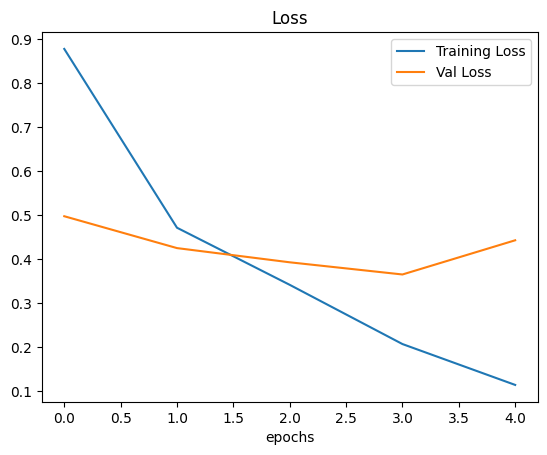

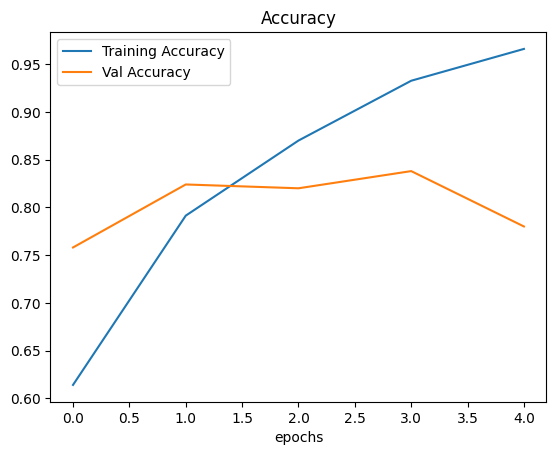

In [37]:
plot_loss_curve(history_4) # appears that overfitting is occuring

### 6. Adjust the model parameters

Reduce overfitting:
* Add data augmentation
* Add regularization layers (MaxPool2D)
* Add more data...

In [38]:
# Create the model (new baseline)
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # max of each 2x2 square in input; cuts height and width by 1/2
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2), # finds "most important" features of each 2x2 square
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [39]:
model_5.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch=len(train_data),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 156ms/step - loss: 0.6359 - accuracy: 0.6380 - val_loss: 0.5350 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4808 - accuracy: 0.7813 - val_loss: 0.4024 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4397 - accuracy: 0.8007 - val_loss: 0.3717 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4171 - accuracy: 0.8220 - val_loss: 0.3523 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4133 - accuracy: 0.8207 - val_loss: 0.3788 - val_accuracy: 0.8300


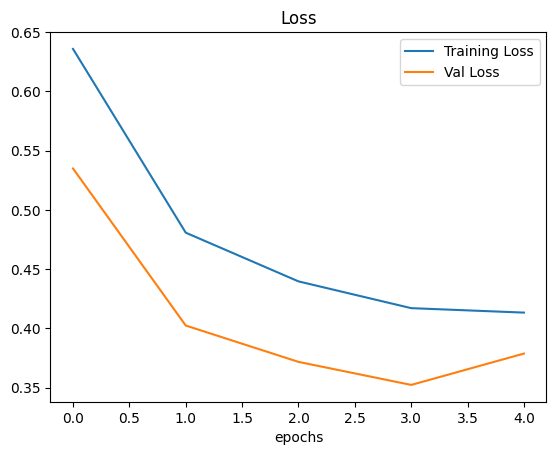

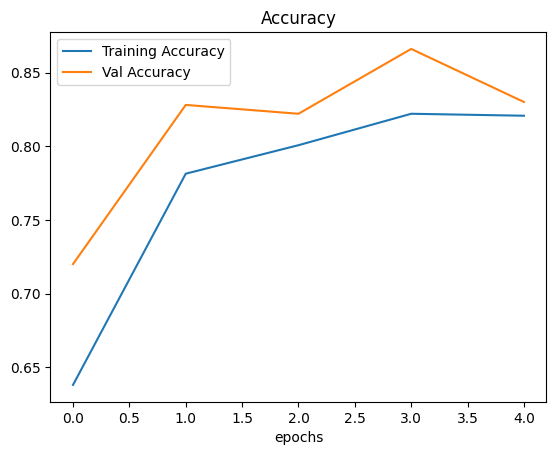

In [41]:
plot_loss_curve(history_5) # overfitting reduced!!; val loss trends with training loss == good

In [42]:
model_5.summary() # less parameters than model_4 but far more accurate / less overfitting

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [43]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Data Augmentation

In [44]:
# Create ImageDataGenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2,
                                             shear_range=0.2, zoom_range=0.2,
                                             width_shift_range=0.2, height_shift_range=0.3,
                                             horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)



> **What is data augmentation?**
* Altering our training data/giving it more diversity
* Forces model to learn more generalization patterns
  * e.g. slight rotations, flips, stretches, etc.

In [45]:
# Import data and augment it from training directory
print("Augmented Traning Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32,
                                                                   class_mode="binary", shuffle=False) # for demonstration purposes
print("Non-augmented Training Data:")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32,
                                               class_mode="binary", shuffle=False)
print("Non-augmented Test data:")
test_data = test_datagen.flow_from_directory(test_dir, class_mode="binary",target_size=(224,224),shuffle=False)

Augmented Traning Data:
Found 1500 images belonging to 2 classes.
Non-augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-augmented Test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is typically only performed on the training data. `ImageDataGenerator` has built in augmentaion parameters. These don't modify
the images in the directory. It changes the images as they are loaded

In [46]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: the labels themselves are not augmented

(-0.5, 223.5, 223.5, -0.5)

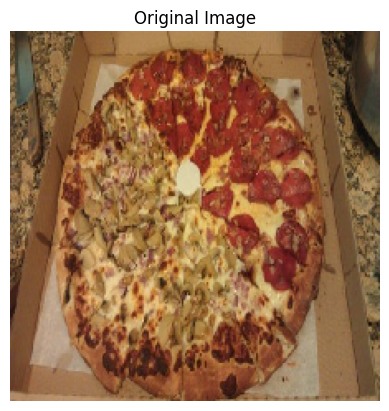

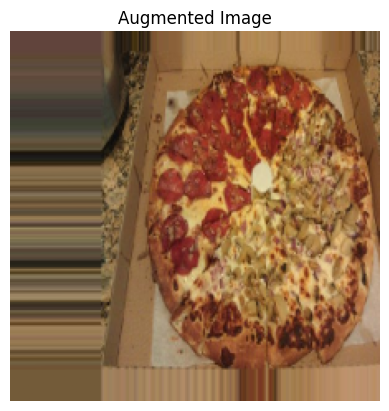

In [47]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [48]:
model_6 = Sequential([
    Conv2D(10,3, activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_6.fit(train_data_augmented,epochs=5, steps_per_epoch=len(train_data_augmented), # fitting model_6 on augmented training set
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 542ms/step - loss: 0.7276 - accuracy: 0.4920 - val_loss: 0.6875 - val_accuracy: 0.5800
Epoch 2/5
47/47 [==============================] - 31s 670ms/step - loss: 0.6886 - accuracy: 0.5207 - val_loss: 0.6739 - val_accuracy: 0.5520
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6739 - accuracy: 0.5300 - val_loss: 0.6467 - val_accuracy: 0.5560
Epoch 4/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6674 - accuracy: 0.5620 - val_loss: 0.6269 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6447 - accuracy: 0.6473 - val_loss: 0.8321 - val_accuracy: 0.5040


In [49]:
# Let's try it with augmented data shuffled
# Import data and augment it from training directory
print("Augmented Traning Data:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32,
                                                                   class_mode="binary", shuffle=True) # for demonstration purposes


Augmented Traning Data:
Found 1500 images belonging to 2 classes.


In [50]:
model_7 = Sequential([
    Conv2D(10,3, activation='relu',input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), # fitting model_7 on augmented shuffled training set
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 725ms/step - loss: 0.6692 - accuracy: 0.5567 - val_loss: 0.5986 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 28s 597ms/step - loss: 0.5820 - accuracy: 0.6853 - val_loss: 0.4709 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 27s 580ms/step - loss: 0.5260 - accuracy: 0.7413 - val_loss: 0.3727 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4931 - accuracy: 0.7653 - val_loss: 0.5281 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 24s 503ms/step - loss: 0.5016 - accuracy: 0.7573 - val_loss: 0.3901 - val_accuracy: 0.8320


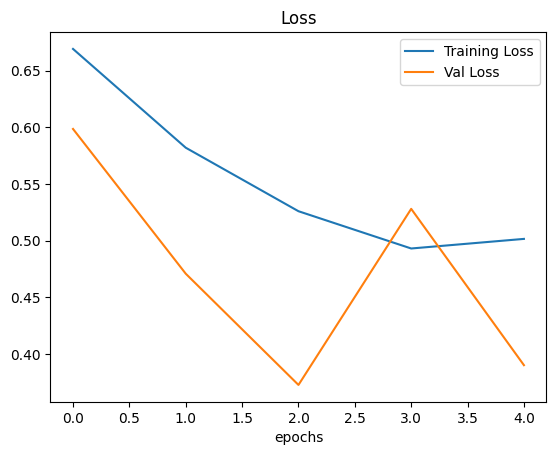

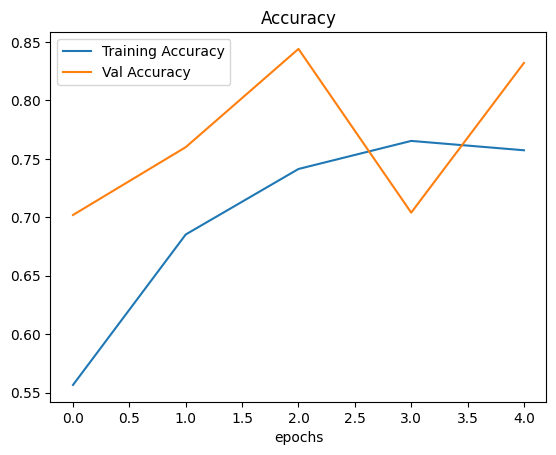

In [51]:
# Plot loss curves
plot_loss_curve(history_7)

### 7. Repeat until satisfied

How could we improve?
* Add layers `Conv2D` / `MaxPool2D`
* Increase number of filters 10 -> 32
* Fit more data
* Fit for longer
* Use **transfer learning**

### Making predicion with our trained model on our own custom data

In [52]:
print(class_names)

['pizza' 'steak']


In [55]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2023-12-31 18:59:06--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg [following]
--2023-12-31 18:59:07--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2023-12-31 18:59:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com 

(-0.5, 3023.5, 4031.5, -0.5)

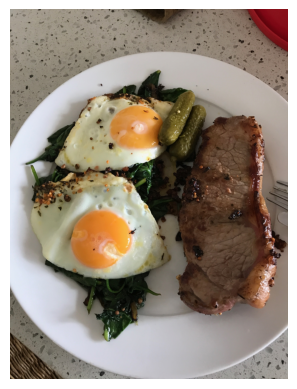

In [57]:
steak = mpimg.imread("/content/03-steak.jpeg?raw=true")
plt.imshow(steak)
plt.axis(False)


In [58]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [59]:
steak.shape

(4032, 3024, 3)

In [60]:
expanded_steak = tf.expand_dims(steak,axis=0)

> Custom data must be preprocessed to match the dimensions/shape of the input data that was used for training

In [62]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and reshapes it to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [63]:
steak = load_and_prep_image("/content/03-steak.jpeg?raw=true")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [69]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 28ms/step


In [70]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [72]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [117]:
def pred_and_plot(model,filename, class_names=class_names):
  # Import target image and preproces it
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else: # binary
    pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 30ms/step


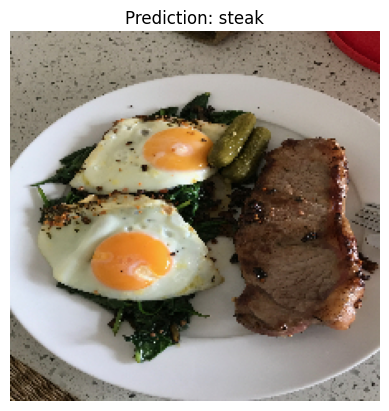

In [74]:
pred_and_plot(model_7, "/content/03-steak.jpeg?raw=true")

--2023-12-31 19:26:03--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2023-12-31 19:26:03--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2023-12-31 19:26:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.gi

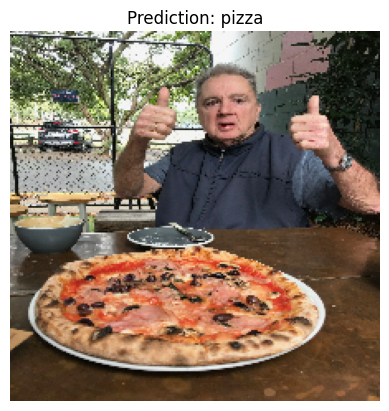

In [75]:
# Dowload another test custom image and make prediction
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
pred_and_plot(model_7, "03-pizza-dad.jpeg?raw=true")

# Multi-Class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust the hyperparameters and improve the model
7. Repeat until satisfied

## 1. Import data

In [79]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-12-31 19:33:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.207, 172.217.212.207, 142.250.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   130MB/s    in 4.0s    

2023-12-31 19:33:50 (125 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [80]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 1

In [81]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [83]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 382, 3)


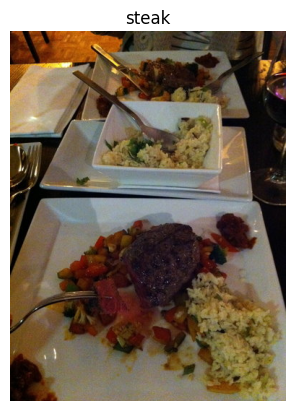

In [96]:
# Visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


### 2. Preprocess the data


In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               batch_size=32, class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                             batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

In [103]:
model_8 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation=tf.keras.activations.softmax)
])

model_8.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch = len(train_data),
            validation_data = test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 132ms/step - loss: 2.2833 - accuracy: 0.1453 - val_loss: 2.0808 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.9210 - accuracy: 0.3341 - val_loss: 1.9180 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 1.4406 - accuracy: 0.5212 - val_loss: 2.1166 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 0.8019 - accuracy: 0.7359 - val_loss: 2.8269 - val_accuracy: 0.2780
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.2930 - accuracy: 0.9105 - val_loss: 4.1384 - val_accuracy: 0.2596


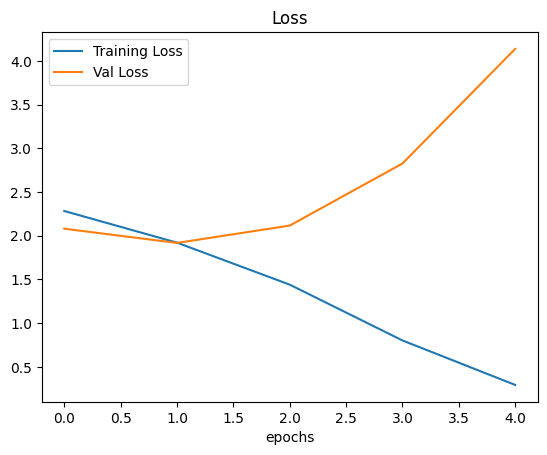

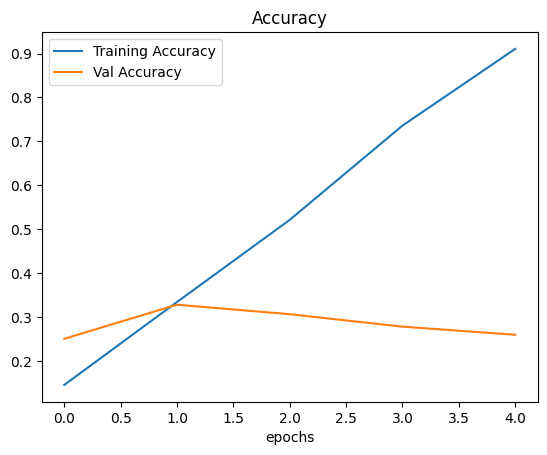

In [104]:
plot_loss_curve(history_8)

### 5. Evaluate the model

In [105]:
# Evaluate on the Test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 4.1384 - accuracy: 0.2596


[4.138391971588135, 0.2596000134944916]

In [ ]:
# Overfitting is clearly occuring


### 6. Adjust different hyperparameters (reduce overfitting)
* How?
  * Data augmentation
  * Regularization
  * *Transfer Learning*

In [106]:
# Simplify the model
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [108]:
# remove two Conv layers from model_8
model_9 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation='relu', input_shape=(22,224,3)),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_9.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
            validation_data = test_data, validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 30s 121ms/step - loss: 2.1652 - accuracy: 0.2209 - val_loss: 1.9805 - val_accuracy: 0.3104
Epoch 2/5
235/235 [==============================] - 33s 140ms/step - loss: 1.7763 - accuracy: 0.3913 - val_loss: 1.9438 - val_accuracy: 0.3316
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.3981 - accuracy: 0.5373 - val_loss: 2.0773 - val_accuracy: 0.3164
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 0.9329 - accuracy: 0.7104 - val_loss: 2.4773 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 32s 135ms/step - loss: 0.4999 - accuracy: 0.8557 - val_loss: 2.8821 - val_accuracy: 0.2868


In [109]:
# No improvement by removing two Conv layers
model_9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [110]:
# Let's try data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255., rotation_range = 0.2,
                                          width_shift_range=0.2, height_shift_range=0.2,
                                          zoom_range=0.2, horizontal_flip=True)
train_data_augmented = train_data_augmented.flow_from_directory(train_dir, target_size=(224,224), class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [111]:
model_10 = tf.keras.models.clone_model(model_8) # clones just model architecture; resets internally learned patterns
model_10.compile(loss= "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [112]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [113]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch = len(train_data),
                          validation_data=test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 117s 479ms/step - loss: 2.2901 - accuracy: 0.1348 - val_loss: 2.1999 - val_accuracy: 0.1788
Epoch 2/5
235/235 [==============================] - 115s 489ms/step - loss: 2.1887 - accuracy: 0.1908 - val_loss: 2.0092 - val_accuracy: 0.2924
Epoch 3/5
235/235 [==============================] - 111s 472ms/step - loss: 2.0957 - accuracy: 0.2553 - val_loss: 1.9848 - val_accuracy: 0.2776
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0384 - accuracy: 0.2805 - val_loss: 1.8858 - val_accuracy: 0.3444
Epoch 5/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0276 - accuracy: 0.2951 - val_loss: 1.8957 - val_accuracy: 0.3392


### Making a prediction with our trained model

In [114]:
# Dowload some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true


--2023-12-31 20:35:46--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg [following]
--2023-12-31 20:35:46--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-hamburger.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg [following]
--2023-12-31 20:35:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.gi

1/1 [==============================] - 0s 18ms/step


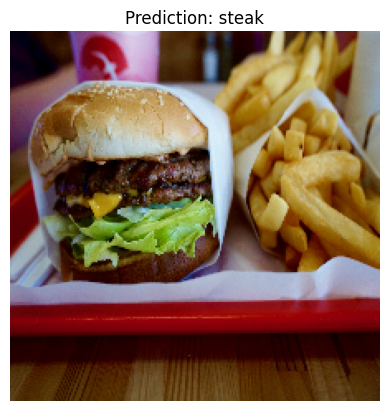

In [119]:
# Make a prediction using model 10
pred_and_plot(model_10,
              filename="/content/03-hamburger.jpeg?raw=true",
              class_names=class_names)

In [120]:
## Saving and loading our model
model_10.save("saved_trained_model_10")

In [121]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)


79/79 [==============================] - 14s 165ms/step - loss: 1.8957 - accuracy: 0.3392


[1.8957128524780273, 0.3391999900341034]

In [122]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.8957 - accuracy: 0.3392


[1.8957124948501587, 0.3391999900341034]

In [123]:
# Saved and loaded properly